### Задание 1: Визуализация решающих поверхностей в kNN.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


Задача 1.1 (0.5 балла)

In [ ]:
X.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


Пропущенных значений нет

In [ ]:
X.dtypes

,0
alcohol,float64
malic_acid,float64
ash,float64
alcalinity_of_ash,float64
magnesium,float64
total_phenols,float64
flavanoids,float64
nonflavanoid_phenols,float64
proanthocyanins,float64
color_intensity,float64


Категориальных переменных нет

Задача 1.2 (0.5 балла)

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(90)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

Использование stratify важно для сохранения равномерного числа объектов каждого класса для тренировочной и тестовой выборок.

Задача 1.3 (1 балл)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

X_train_norm = pd.DataFrame(X_train_norm, columns = data['feature_names'])
X_test_norm = pd.DataFrame(X_test_norm, columns = data['feature_names'])

X_train_norm =  X_train_norm[['alcohol','magnesium']]
X_test_norm =  X_test_norm[['alcohol','magnesium']]

k_neighbours = [1, 3, 5, 10, 15, 25]

print('NN \t Train \t Test ')

from sklearn.metrics import accuracy_score

for k in k_neighbours:
  clf = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
  clf.fit(X_train_norm, y_train)

  train_predict = clf.predict(X_train_norm)
  test_predict = clf.predict(X_test_norm)

  train_accuracy = accuracy_score(y_train, train_predict)
  test_accuracy = accuracy_score(y_test, test_predict)

  print(f"{k} \t {train_accuracy:.2f} \t {test_accuracy:.2f}")

NN 	 Train 	 Test 
1 	 1.00 	 0.69
3 	 0.81 	 0.65
5 	 0.77 	 0.70
10 	 0.73 	 0.65
15 	 0.76 	 0.72
25 	 0.73 	 0.67


Задача 1.4 (0 баллов)

In [ ]:
!pip install mlxtend

In [ ]:
import mlxtend

Задача 1.5 (1 балл)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/pytho

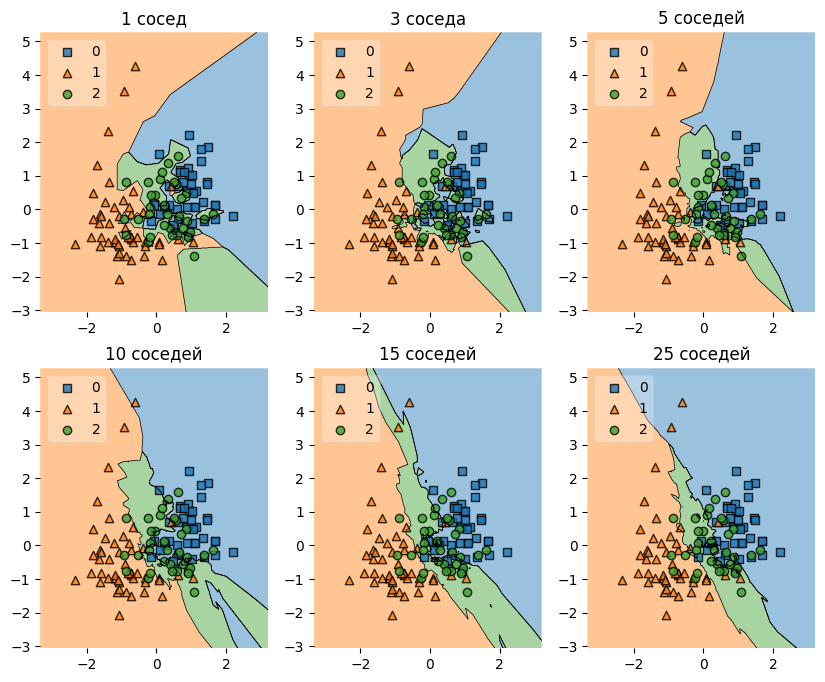

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ['1 сосед', '3 соседа', '5 соседей', '10 соседей', '15 соседей', '25 соседей']

for k, lab, grd in zip(k_neighbours,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    clf = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    clf.fit(X_train_norm, y_train)
    X_train_norm_np = X_train_norm.to_numpy()
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train_norm_np, y = y_train, clf = clf, legend = 2)
    plt.title(lab)

plt.show()

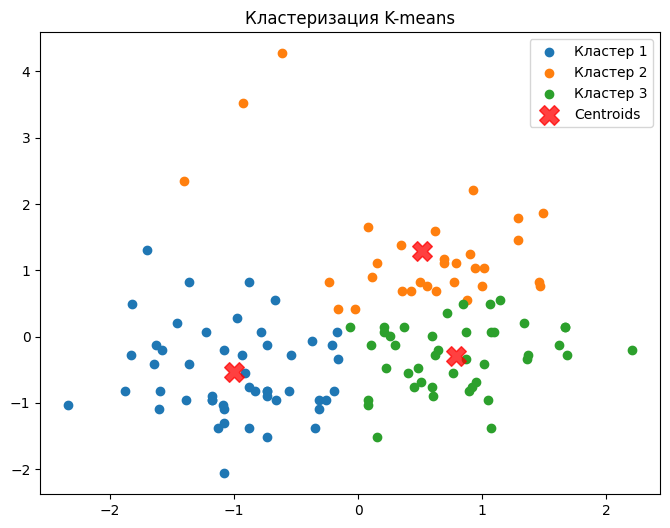

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Снижение размерности с помощью PCA для упрощенной визуализации
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_train_norm)

# Применение KMeans кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_norm)
y_kmeans = kmeans.predict(X_train_norm)

# Визуализация результатов
plt.figure(figsize=(8, 6))
for cluster_num in range(3):
    plt.scatter(X_train_norm_np[y_kmeans == cluster_num, 0],
                X_train_norm_np[y_kmeans == cluster_num, 1],
                label=f'Кластер {cluster_num + 1}')
plt.legend()
# Отображение центров кластеров
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label="Centroids")

plt.title("Кластеризация K-means")
# plt.xlabel("PCA Component 1")
# plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

<ipython-input-42-c896b2caf6f6>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


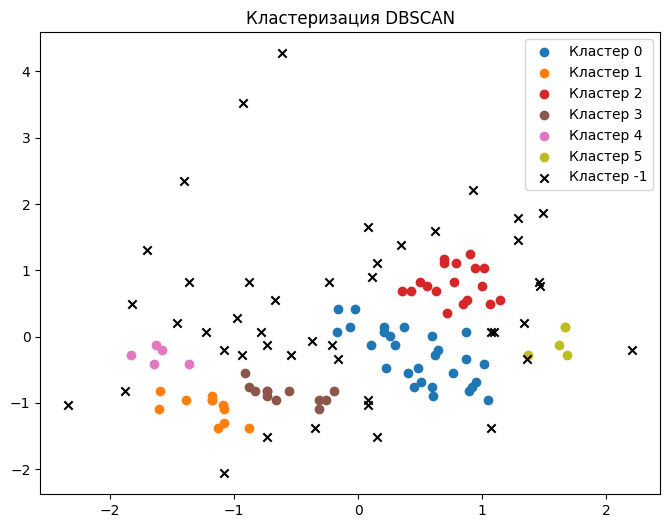

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons


# Генерация данных
# X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
# X = StandardScaler().fit_transform(X)

# Применение DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_train_norm, y_train)

# Визуализация результатов
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for label in unique_labels:
    if label == -1:
        color = "k"  # Черный цвет для выбросов
        marker = "x"
    else:
        color = colors(label)
        marker = "o"

    plt.scatter(X_train_norm_np[labels == label, 0], X_train_norm_np[labels == label, 1], c=[color], label=f"Кластер {label+1}", marker=marker)

plt.legend()
plt.title("Кластеризация DBSCAN")
# plt.xlabel("Признак 1")
# plt.ylabel("Признак 2")
plt.show()


<ipython-input-14-7d9daabe8280>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


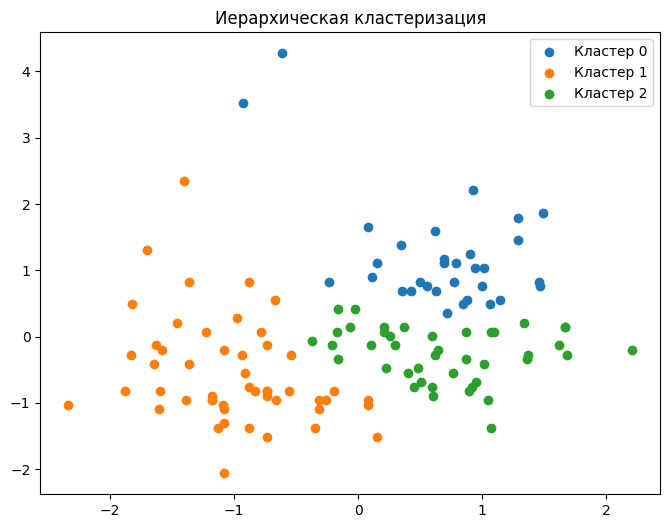

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Применение иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X_train_norm, y_train)

# Визуализация результатов (первые два признака)
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for label in unique_labels:
    color = colors(label)
    marker = "o"

    plt.scatter(X_train_norm_np[labels == label, 0], X_train_norm_np[labels == label, 1], label=f"Кластер {label+1}", marker=marker)

plt.legend()
plt.title("Иерархическая кластеризация")
# plt.xlabel("Признак 1")
# plt.ylabel("Признак 2")
plt.show()


<ipython-input-45-a812f72d712c>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


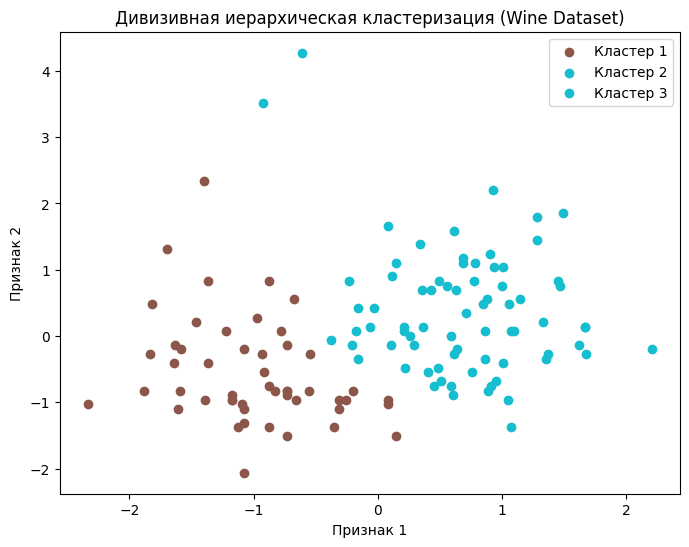

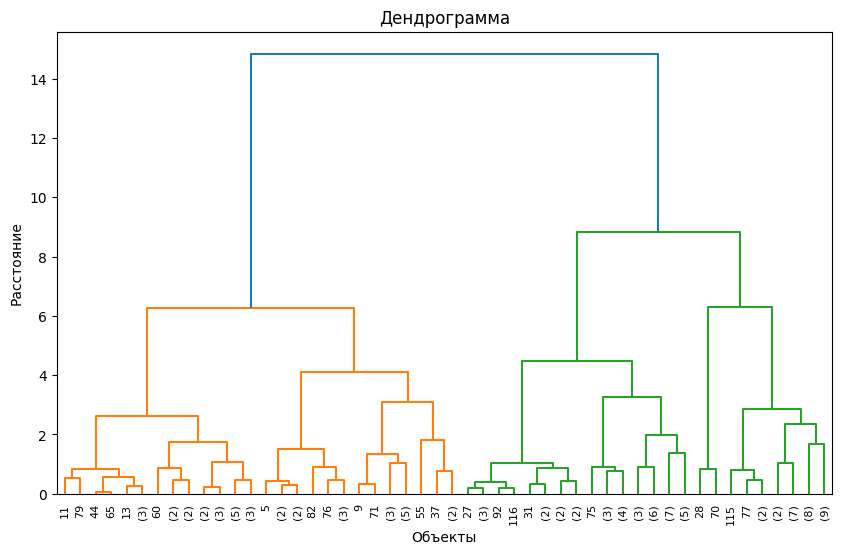

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Применение дивизивной иерархической кластеризации
Z = linkage(X_train_norm, method='ward')  # Метод Уорда для минимизации дисперсии
labels = fcluster(Z, t=3, criterion='maxclust')  # Разбиение на 3 кластера

# Визуализация результатов (первые два признака)
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for label in unique_labels:
    color = colors(label)
    marker = "o"

    plt.scatter(X_train_norm_np[labels == label, 0], X_train_norm_np[labels == label, 1], c=[color], label=f"Кластер {label}", marker=marker)

plt.legend()
plt.title("Дивизивная иерархическая кластеризация (Wine Dataset)")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

# Визуализация дендрограммы
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Дендрограмма")
plt.xlabel("Объекты")
plt.ylabel("Расстояние")
plt.show()


Задача 1.6 (0.5 балла)

Судя по полученным результатам в задании 1.3, можно выделить 3, 5 и 15 ближайщих соседей, так как они показывают более менее хорошие результаты на тестовой и тренировочной выборках. Из задания 1.5 очевидным становится отбрасывание варианта с 15 соседями, так как в верхней части графика мы видим, что два объекта попали не в свои категории, хотя зона вокруг них должна быть оранжевой, так как поблизости нет объектов других категорий. Очень хорошо себя проявили модели с 1, 3 и 5 ближайщими соседями. Модель с 1 соседом мы не можем рассматривать, так как она переобучена. Из моделей с k = 3 и k = 5 выберем ту, у которой лучше показатели на тестовой выборке. В таком случае выбираем модель с 5 ближайщими соседями.

### Задание 2. KNN своими руками. 2 Балла

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      predict = []
      for i in X:
        distance = [self.count_distance(i, j) for j in self.X_train] # для каждого объекта будем находить расстояние между самим объектом и остальными
        k_index = np.argsort(distance)[:self.k] # отсортируем объекты по расстоянию от меньшего к большему и выберем k ближайщих
        obj = self.y_train[k_index] # каждому объекту присвоим класс
        predict.append(np.bincount(obj).argmax()) # выберем наиболее популярный класс
      return np.array(predict)

    def count_distance(self, x, y):
      return np.sqrt(np.sum((x - y) ** 2)) # подсчёт расстояния между объектами

In [ ]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
test_knn(KNN)

### Задание 3: Линейная регрессия

In [ ]:
!wget https://github.com/hse-ds/iad-intro-ds/blob/master/2024/homeworks/hw04_knn_linreg/diamonds.csv

A = pd.read_csv('diamonds.csv')
A.head(5)

--2024-03-25 23:28:02--  https://github.com/hse-ds/iad-intro-ds/blob/master/2024/homeworks/hw04_knn_linreg/diamonds.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘diamonds.csv.7’

diamonds.csv.7          [ <=>                ] 143.75K   792KB/s    in 0.2s    

2024-03-25 23:28:03 (792 KB/s) - ‘diamonds.csv.7’ saved [147199]



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Задача 3.1 (0.2 балла)

In [ ]:
A.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
A = A.drop('Unnamed: 0', axis = 1) #сомневаюсь, что столбец Unnamed: 0 несёт какую-то существенную информацию,  поэтому удалим его

Задача 3.2 (0.1 балла)

<ipython-input-311-ff1345365a57>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  h_map = sns.heatmap(A.corr(), cmap='coolwarm', annot=True, fmt="0.2f");


Text(0.5, 1.0, 'Correlation heatmap')

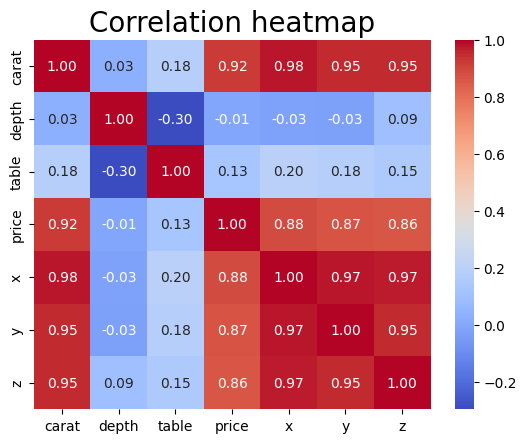

In [ ]:
import seaborn as sns

h_map = sns.heatmap(A.corr(), cmap='coolwarm', annot=True, fmt="0.2f");
for num in h_map.texts:
  num.set_text(num.get_text())

plt.title("Correlation heatmap", size = 20)

Больше всего цена бриллианта коррелирует с такими признаками, как "carat", длина, ширина и высота.

Задача 3.3 (0.1 балла)

In [ ]:
# воспользуемся функцией get_dummies
A_new = pd.get_dummies(data=A, drop_first=False)
A_new.head(5)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


Задача 3.4 (0.2 балла)

In [ ]:
np.random.seed(91)

y = A_new['price']
X = A_new.loc[:, A_new.columns != 'price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# хз, как тут stratify использовать. как минимум один класс имеет только 1 объект, поэтому без понятия, как это реализовать

Задача 3.5 (0.3 балла)

In [ ]:
X_train_norm = StandardScaler().fit_transform(X_train)
X_test_norm = StandardScaler().fit_transform(X_test)

X_train_norm_pd = pd.DataFrame(data= X_train_norm, columns = X_train.columns)
X_test_norm_pd = pd.DataFrame(data= X_test_norm, columns = X_test.columns)

Задача 3.6 (0.2 балла)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

lr = LinearRegression().fit(X_train_norm_pd, y_train)

print(f"Train: {mean_squared_error(y_train, lr.predict(X_train_norm_pd))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(X_test_norm_pd))}")

Train: 1282334.5651680992
Test: 1270771.3496354287


Задача 3.7 (0.2 балла)

In [ ]:
for i, j in zip(lr.coef_, X_train_norm_pd):
    print(f"{j}: {i}")
print("Свободный член:", lr.intercept_)

carat: 5386.728227725029
depth: -86.60556493457182
table: -65.85797860429624
x: -1154.3892522796443
y: 90.68309144018556
z: -132.73681080414468
cut_Fair: -123.90645021726911
cut_Good: -41.13085581790318
cut_Ideal: 52.84283962283718
cut_Premium: 16.81906750190973
cut_Very Good: -0.3124237286299311
color_D: 211.36719450455476
color_E: 161.13712159779706
color_F: 134.93521185024696
color_G: 58.28470209631552
color_H: -128.74541769514295
color_I: -251.62337030005418
color_J: -386.3278653083337
clarity_I1: -459.7639411562443
clarity_IF: 234.25991360017233
clarity_SI1: -145.7139747670737
clarity_SI2: -493.84823215158156
clarity_VS1: 204.75752608908812
clarity_VS2: 105.59581642579803
clarity_VVS1: 248.2701407796321
clarity_VVS2: 276.6031621218058
Свободный член: 3952.583717357911


  Показатель качества карат и длина (х) по модулю сильно больше остальных коэффициентов.

Задача 3.8 (0.4 балла)

In [ ]:
lasso = Lasso(10).fit(X_train_norm_pd, y_train)
print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train_norm_pd))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test_norm_pd))}")

ridge = Ridge(10).fit(X_train_norm_pd, y_train)
print("\nRidge")
print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train_norm_pd))}")
print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test_norm_pd))}")

Lasso
Train: 1293197.0045551972
Test: 1274864.3834481726

Ridge
Train: 1282406.514624015
Test: 1270501.1297919115


In [ ]:
# Веса модели Lasso
for i, j in zip(lasso.coef_, X_train_norm_pd):
    print(f"{j}: {i}")
print("Свободный член:", lasso.intercept_)

carat: 4935.014391909367
depth: -54.85767195553033
table: -52.375178354171105
x: -618.2007249948934
y: -0.0
z: -147.25229199718484
cut_Fair: -125.81897492944911
cut_Good: -41.56964655289377
cut_Ideal: 44.785533317715675
cut_Premium: 0.0
cut_Very Good: -0.0
color_D: 145.71023340288386
color_E: 88.71713025508087
color_F: 62.78190880504823
color_G: -0.0
color_H: -173.31926827175363
color_I: -281.4293093420274
color_J: -402.93795001234554
clarity_I1: -476.48114780289575
clarity_IF: 182.6012041120289
clarity_SI1: -254.85385197870974
clarity_SI2: -579.9438763729665
clarity_VS1: 101.26783015895741
clarity_VS2: -0.0
clarity_VVS1: 179.74532158315432
clarity_VVS2: 196.32257456209175
Свободный член: 3952.5837173579107


In [ ]:
# Веса модели Ridge
for coef, feat in zip(ridge.coef_, X_train_norm_pd):
  print(f"{feat}: {coef}")
print(f"Свободный член: {ridge.intercept_}")

carat: 5348.850876129719
depth: -82.72012350332962
table: -65.56152037214521
x: -1090.6602277697425
y: 79.09326993392784
z: -148.06478984815325
cut_Fair: -124.20086055674975
cut_Good: -41.202926316440674
cut_Ideal: 52.93361867546142
cut_Premium: 16.578480809088084
cut_Very Good: 0.004130789510739246
color_D: 211.09227955443777
color_E: 160.8834003119942
color_F: 134.50065927457558
color_G: 58.04322170228751
color_H: -128.51982755234926
color_I: -250.95964333031355
color_J: -385.54972933231426
clarity_I1: -459.34843210154213
clarity_IF: 234.6417104745936
clarity_SI1: -146.25007247096482
clarity_SI2: -493.72078408925
clarity_VS1: 204.59066318124195
clarity_VS2: 105.42672616917348
clarity_VVS1: 248.75153117978417
clarity_VVS2: 276.86608812121875
Свободный член: 3952.583717357911


Можно заметить, что использование модели Lasso уменьшает веса некоторых признаков уменьшился. Например, вес признака carat и х сильно уменьшились, а некоторые из них вообще занулились. При этом MSE в случае этой модели только увеличилось.

В случае модели Ridge все большие веса уменьшились, но не значительно. MSE немного подрос.

В итоге можно сказать, что модель Ridge показала себя лучше, чем Lasso, но при этом изначальная модель показала себя лучше всего, а значит мультиколлинеарность не сильно влияла на работу модели.

Задача 3.9 (0.4 балла)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.547e+08, tolerance: 6.066e+07
  model = cd_fast.enet_coordinate_descent(


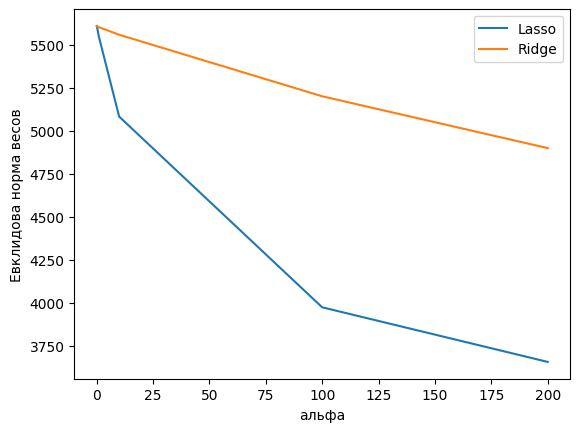

In [ ]:
a = [0.1, 1, 10, 100, 200]
norms_l = []
norms_r = []

for i in a:
  lasso = Lasso(alpha = i).fit(X_train_norm_pd, y_train)
  ridge = Ridge(alpha = i).fit(X_train_norm_pd, y_train)

  norms_l.append(np.linalg.norm(lasso.coef_))
  norms_r.append(np.linalg.norm(ridge.coef_))

plt.xlabel("альфа")
plt.ylabel("Евклидова норма весов")

plt.plot(a, norms_l, label = 'Lasso')
plt.plot(a, norms_r, label = 'Ridge')
plt.legend()

plt.show()

Метод Лассо агрессивнее уменьшает веса. Это видно на графике. Также в большинстве случаев используется этот метод, так как он может занулять бесполезные веса, а также сильнее штрафует.

Задача 3.10 (0.5 балла)

In [ ]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv = 5).fit(X_train_norm_pd, y_train)

a = lasso_cv.alphas_
mse = np.mean(lasso_cv.mse_path_, axis=1)

optimal_a = a[np.argmin(mse)]
print(optimal_a)

3.6953258047471924


Задача 3.11 (0.5 балла)

In [ ]:
lasso_final = Lasso(optimal_a).fit(X_train_norm_pd, y_train)

for i, j in zip(lasso_final.coef_, X_train_norm_pd):
    print(f"{j}: {i}")

print(f"Свободный член: {lasso_final.intercept_}")

carat: 5224.118031375311
depth: -79.75677657530447
table: -61.00990424685394
x: -938.2176669862768
y: -0.0
z: -103.47813732958079
cut_Fair: -128.64647714933503
cut_Good: -47.277239585148756
cut_Ideal: 39.381267123815014
cut_Premium: 0.0
cut_Very Good: -8.148910679796826
color_D: 156.88639052282167
color_E: 99.32460212259538
color_F: 73.69620149154942
color_G: -0.0
color_H: -178.0455610902125
color_I: -289.90951005553967
color_J: -412.56077985765404
clarity_I1: -484.34068038688923
clarity_IF: 186.85143475644213
clarity_SI1: -254.09925507969842
clarity_SI2: -585.401561421887
clarity_VS1: 109.73543663078539
clarity_VS2: -0.0
clarity_VVS1: 183.10551602446554
clarity_VVS2: 200.75843474204095
Свободный член: 3952.5837173579107


В итоге наиболее информативными признаками являются: показатель карат, длина камння, а также 3 уровня чёткости (я выбрал те, которые  по модулю больше 400). Насколько мне известно, больше всего на цену алмаза влияет именно его карат, а также его длина, и модель это подтверждает. Остальные признаки тоже  являются информативными (кроме тех, которые занулились), но они не влияют на модель так же сильно, как вышеупомянутые признаки.

Задача 3.12 (0.4 балла)

In [ ]:
lasso_final_predict = lasso_final.predict(X_test_norm_pd)

print('MSE для тестовой выборки')
print(mean_squared_error(y_test, lr.predict(X_test_norm_pd)))

print('MSE для тестовой выборки при оптимальной модели Lasso')
print(mean_squared_error(y_test, lasso_final_predict))

MSE для тестовой выборки
1270771.3496354287
MSE для тестовой выборки при оптимальной модели Lasso
1268392.9008862418


В итоге мы получили, что оптимальная Lasso модель оказалась лучше изначальной. Мы видим, что у Lasso MSE меньше  примерно на 2600, что в сравнении с общим функционалом ошибки не так уж и существенно. Но тем не менее, модель Lasso оказалась лучше.